<a href="https://colab.research.google.com/github/skintl/health-care-insurance-supervised-machine-learning/blob/main/health_care_insurance_supervised_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import os

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df=pd.read_csv('/insurance.csv')

In [9]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: >

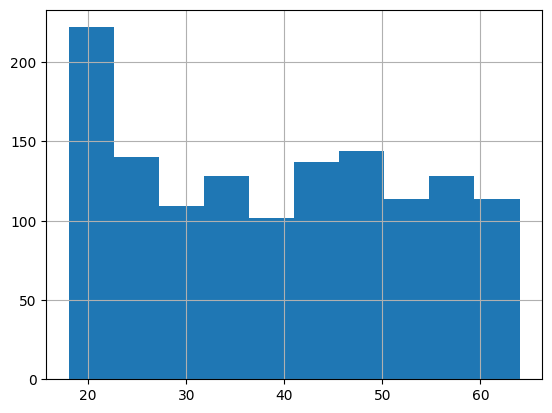

In [15]:
df.age.hist()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
dummies = pd.get_dummies(df[['sex','smoker','region']],drop_first=True)
dummies = dummies.astype(int)
display(dummies)

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
1333,1,0,1,0,0
1334,0,0,0,0,0
1335,0,0,0,1,0
1336,0,0,0,0,1


In [ ]:
df_2 = pd.concat([df,dummies],axis=1)
df_2.drop(columns={'sex','smoker','region'},inplace=True)
df_2

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [ ]:
correlation = df_2.corr()['charges']
correlation

age                 0.299008
bmi                 0.198341
children            0.067998
charges             1.000000
sex_male            0.057292
smoker_yes          0.787251
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
Name: charges, dtype: float64

In [ ]:
independent_variables = df_2[['age','bmi','sex_male','smoker_yes','region_northwest','region_southeast','region_southwest']]
independent_variables

,age,bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1
1,18,33.770,1,0,0,1,0
2,28,33.000,1,0,0,1,0
3,33,22.705,1,0,1,0,0
4,32,28.880,1,0,1,0,0
...,...,...,...,...,...,...,...
1333,50,30.970,1,0,1,0,0
1334,18,31.920,0,0,0,0,0
1335,18,36.850,0,0,0,1,0
1336,21,25.800,0,0,0,0,1


In [ ]:
target_variable = df_2['charges']
target_variable

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
x = independent_variables.to_numpy()
y= target_variable

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
lr= linear_model.LinearRegression()
lr

LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
coefficient = lr.coef_
coefficient

array([ 2.59260167e+02,  3.36572870e+02, -2.17545814e+00,  2.36737435e+04,
       -3.36820721e+02, -6.73822153e+02, -8.08196184e+02])

In [ ]:
intercept = lr.intercept_
intercept

-11551.593102676832

In [ ]:
prediction= lr.predict(df_2[['age','bmi','sex_male','smoker_yes','region_northwest','region_southeast','region_southwest']])
prediction

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([25630.28046248,  3805.15810879,  6138.59866911, ...,
        4843.97800619,  1768.25426422, 37384.37319756])

In [ ]:
df_2['prediction'] = prediction
df_2.reset_index(drop=True, inplace=True)
df_2

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,prediction
0,19,27.900,0,16884.92400,0,1,0,0,1,25630.280462
1,18,33.770,1,1725.55230,1,0,0,1,0,3805.158109
2,28,33.000,3,4449.46200,1,0,0,1,0,6138.598669
3,33,22.705,0,21984.47061,1,0,1,0,0,4306.883241
4,32,28.880,0,3866.85520,1,0,1,0,0,6125.960545
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0,11496.080850
1334,18,31.920,0,2205.98080,0,0,0,0,0,3858.495910
1335,18,36.850,0,1629.83350,0,0,0,1,0,4843.978006
1336,21,25.800,0,2007.94500,0,0,0,0,1,1768.254264


In [ ]:
model = sm.OLS(y_train,sm.add_constant(x_train))
result = model.fit()
summary = result.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     431.5
Date:                Sun, 22 Oct 2023   Prob (F-statistic):          2.64e-305
Time:                        17:16:24   Log-Likelihood:                -10849.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1062   BIC:                         2.175e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.155e+04   1109.333    -10.413      0.0

Please upvote if thi was useful